<a href="https://colab.research.google.com/github/sonahyoung/class2022Spring/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

기본적으로 sin 곡선이다 라고 할때, x축은 시간임. 시간상에서 높낮이도 중요하지만, 주파수로 분석하는 것이 중요함.

아래 사이트를 들어가면, spectrogram이 보임.
어떤 signal이 있다. 시간축에 파형이 있을때, 어떤 성분이 있는지가 중요함. 낮은음이 많은지, 높은 음이 많은지, 얼만큼 체계적으로 많은지 보여주는 것이 spectrogram임.

어떤 주파수가 입체적으로 많은지 보여주는 것이 spectrogram

(x축은 시간, y축은 주파수)
-높은 음이 많으면, 노랗고 빨갛게 나올거임.
-어디가 성분이 얼만큼 많냐에 따라서, 아 모음인지, 이 모음인지 구별이 가능함.

손가락 부분을 누르고 위로 하면, 위쪽의 sin 곡선이 만들어지는 거임. (마찬가지로 x축은 시간, y축은 주파수), 아래쪽으로 내리면, 아래쪽의 낮은 주파수 성분이 있는거임.

일상에 있는 목소리는 하나의 sin곡선으로 만들어지지 않음. 여러가지 성분들이 합쳐져있음. (악기들도 마찬가지임)

-휘파람은 비교적 하나의 sin 곡선하고 비슷한 형태 보임.

어떤 음을 내는 것같지만, 그것과 공명하는 다른 음도 함께 나고 있다고 이해.

-wave상에서는 이런걸 볼 수 없고 주파수 상에서 분석해야지 알 수 있음.

-주파수 분석을 보고 있는거임.

# Audio Processing
---

https://musiclab.chromeexperiments.com/Spectrogram/

### Fourier transform (분석용)
-분석하는 용도
* spectrum은 주어진 signal에 대해 어떤 주파수 성분이 많이 있나?
- 아, 에, 이, 오 이런 주어진 것에 대해서 분석
- 낮은 주파수, 높은 줖파수에는 어떻게 있다 이런거를 보는거임.
* spectrogram은 spectrum을 time 축으로 concatenate한 것
* 방법: signal (inner product) a series of complex phasors with different frequencies
- given signal이 있을때, 여러가지 다양한 주파수를 갖도록 sin 곡선들을 만들어낸다. inner product를 해서 plotting을 하는 거임. 결과값을 하나의 좌표평면에 점으로 plotting해주는 거임.
ex) 10hz부터 5000hz까지 500개의 complex phasor를 우리가 궁금해하는 signal에다가 곱해줌(inner product) 그러면 값이 나오는데, 값을 좌표평면에 뿌려주면 됨.
* inner product는 일종의 correlation (즉, 해당 frequency가 얼마나 있는지 probing)
-해당 주파수가 얼마나 있는지 알려준다. ex. 10hz짜리를 inner product해서 나오는 값이 작으면 given signal에 그게 없다는 말임.
* 왜? sine phasor 안 쓰나? phase sensitivity 때문

### Filter (변환용)  - 신호에 대해서 실제로 변형을 주는 것
-실제로 조작을 가해서 바꾸는 용도
* A --> function -->  B
* signal A --> filter --> signal B
* 신호 (time function)를 입력으로 하는 함수를 filter라고 함 (x축이 time이라는 말임)
* 왜? filter 라고 부름? 이 함수의 목적이 특정 주파수에 대한 manipulation이므로.
(예: 어떤 주파수대를 작게, 크게, 통과, 제거 등)
ex. 저음 부분을 약하게 하고 싶으면 낮은 주파수를 작게 해주라고 하면 됨. 100hz에서 500hz까지(비교적 낮은 주파수)는 좀 빼라고 할 수 있는거임.
-소리에 대해서 변형을 가하고 싶을때는 주파수로 이야기함. 그걸 fiter라고 함. 원래 변형이라고 하면 함수라고 많이 하는데 왜 filter냐? (소리 변형도 함수라고 부를 수 있긴 한데, 그냥 filter라고 많이 쓰는거임) -> transformation하는 용도
+특정 주파수에 대한 조작이기 때문에 filter라고 함
* 방법: weighted sum of signal's shifts (두가지 방법: FIR, IIR) (weight는 b1, b2 이런거)

  * FIR: Y(k) = b<sub>1</sub>X(k) + b<sub>2</sub>X(k-1) + ... 
    - Y = H * X (입력에 H라는 filter를 X에 곱하라는 의미) 
    -> b1X(k): 원 signal에 뭐를 곱하고
    -> b2X(k-1): 하나 shifted 시키고 뭐를 곱하고
    -> 이외에도 더 할 수 있음.
    -> 이거를 FIR filter라고 부르는 거임.
    (b1, b2, b3)가 중요함.
    -> 이거는 아래와 다르게 x에다가 곱해줌(입력을 shift시키고 각각 곱해주고 출력으로 뽑아냄)
  * IIR: a<sub>1</sub>Y(k) + a<sub>2</sub>Y(k-1) + ... = X(k)
    - Y = (1/H) * X (위의 filter와 역함수 관계)
    -> y에다가 곱해줌(입력은 그대로 두고 출력을 shift시킨거임.)
    -> a1, a2, a3가 중요함.

-> 여기에서는 b1, b2, b3 그리고 a1, a2, a3가 그냥 제일 중요함. 이거 숫자는 이미 다 만들어져있어서 모든게 다 정해져있음.
-> 효과가 하나도 없게 하고 싶으면, b1 = 1이면 b2부터 다 0 이면 filter의 역할이 하나도 없어지는 거임.
-> a1 = 1, a2부터 다 0이면 filter의 역할이 하나도 없는거임.

### Auto correlation
* measuring pitch / F0
-> pitch를 재는 것, '아'라고 해서 목소리에 높낮이가 있을때

### RMS: root mean square
* measuring intensity

spectrum은 x축이 frequency이고 y축이 amplitude인 그림 한장이 있음. 그게 시간축으로 계속 있으면 그걸 위에서 봤을때 아까 사이트에서 본 그림이 나옴. -> spectrogram

concat of spectrums over time = spectrogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

### load / plot / play sound file

In [5]:
# from google.colab import files
# fn = files.upload()
#이걸 실행하면 내 컴퓨터에 있는 파일 가져와서 사용할 수 있음.

In [12]:
# from google.colab import files
# fn = files.upload()
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")  #이렇게 하면 서버 계정에 저장이 됨.

s, sr = librosa.load('aeiou.wav') #librosa라는 sound processing 관련된 library를 이용
#s -> (48600,)의 1차원 벡터로 되어있음.
#sr -> 22050 (1초에 22050개의 숫자가 있다)
#48600개의 숫자가 있는 거니까 sr이 22050정도 되니까 2초 조금 넘는 신호길이일거임.

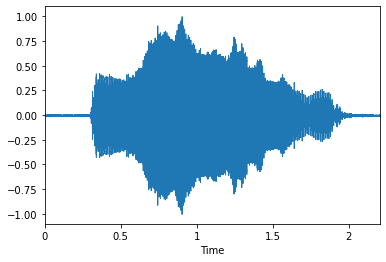

In [15]:
s = librosa.util.normalize(s)  #실행해보면 y축이 -1에서 1까지 자리잡고 있는데, 원래 signal은 그렇지 않았음. normalize한다는 말은 -1부터 1까지 예쁘게 scale up/down해준다는 말임.
librosa.display.waveplot(s, sr)  #plotting해주는거
ipd.Audio(s[7000:12000], rate=sr)  #[7000:12000]이 없어도 실행이 됨. 그럼 이것의 의미? 7000번째 sample부터 12000번째 sample까지만 선택하면 '아' 모음만 있음.

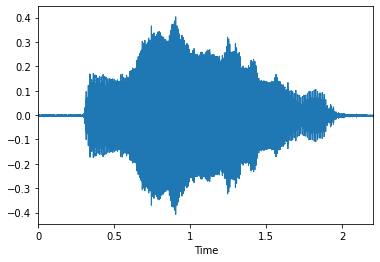

In [13]:
#s = librosa.util.normalize(s)  #normalize를 안해주면 -0.4, 0.4 이렇게 되어있음.
#normalize를 하면 내부적으로 전체의 숫자값들의 절댓값의 최댓값, 그걸로 모든 숫자를 나누기 할 수 있음. 만약 그게 0.4이었다면 모든 숫자들을 0.4로 나누어줄 수 있음.
#그렇게 되면 제일 최고 큰 숫자가 1이 되도록 만들 수 있음.
librosa.display.waveplot(s, sr)
ipd.Audio(s[7000:12000], rate=sr)

### Fourier Transform for Spectrogram

위에서 '아' 했던 거를 가지고 spectrogram을 만들어보는거임. - given signal이 '아'가 되는거임.

신호가 위에 있는 것처럼 있음. 근데 이게 한꺼번에 있는 게 아니라 spectrum을 여러가지를 만들어야 spectrogram이 되는거임. spectrum을 여러번 해야함. 처음부터 한장한장 만들고, 살짝 옆으로 옮겨가 또 spectrum을 한장 만든다. 이 한장의 길이는 미리 정해야함. 그게 win_length임. 그리고 옆으로 옮겨간 살짝 옮겨간 그 길이를 hop_length라고 함.

(0.0, 5000.0)

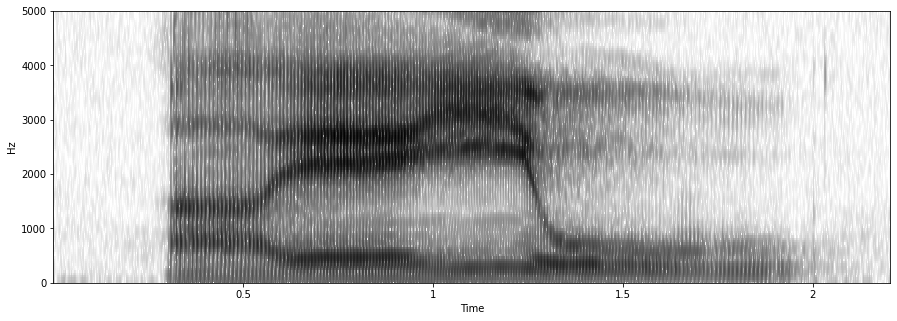

In [16]:
s_preemp = librosa.effects.preemphasis(s)

n_fft=512  #512개의 주파수를 만들어준다. spectrum 1장을 만들때 얼만큼 촘촘하게 만들어주느냐 - x축이 frequency라고 한다면, 그 x축을 512개로 나눈거임. 제일 끝은 sampling rate, 22050이 되는거고 512개로 spectrum을 만들어낸다. 
hop_length=int(0.001*sr)
win_length=int(sr*0.008)  #sampling rate이 22050임.

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann')
#ft = fourier transform
magspec = np.abs(spec)  #이 부분이 중요함. 아까 우리가 어떤 signal이 있고 complex phasor와 inner product를 해준다고 했는데, complex phasor이기 때문에 inner product와 해서 하나의 값이 나오기는 하지만, 이 값이 a+bi 형태의 복소수일거임. (이걸 어떻게 한 점으로 찍어줄거냐) - 그걸 abs가 해결해줌
#어떤 복소수든 실수 a와 복소수 b로 나뉘어질거임. 그걸 (a, b)로 찍어주는 거임. absolute 값은(abs 값은) 원점에서 (a,b)의 거리임.
#그래서 x축이 frequency인 좌표평면에서 찍히는 y값, value값은 복소수에서 원점으로부터 거리라고 생각하면 됨.
#그래서 결국 복소수에서 실수가 되는거임
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)  #어떤 값이 나오면 그거를 데시벨의 형태로 바꾸어줘야한다.

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))

(시험문제)
예를 들어, window가 0.008초짜리가 조금씩 0.001만큼 이동해서 계속 나가는 거임. 이 한장의 spectrum이 쌓여서 결국 우리가 위에 흑백에서 보는 spectrogram이 만들어지는거임.

그럼 이 그림에서 한장의 spectrum이 과연 뭘까?
(x축이 frequency, y축이 amplitude인 좌표평면에서 그림이 그려져있음) - spectrum

(y축이 frequency) - spectrogram
(아래쪽으로 갈수록 낮은 음, 위로 갈수록 높은 음)

그림에서는 입체적으로 나타내기 어렵기 때문에, 까만부분이 우리에게 튀어나와 있고, 흰 부분이 우리 눈에서 더 꺼져잇다고 생각하면 됨. 입체를 눕혀놓은 그림이니까.

어떤 소리, signal에 대해서 어떤 주파수의 성분들이 많이 들어있는가를 알기 위해서 찔러보는거임. 높은 주파수를 찔러서 돌아오는 게 많으면 그게 많구나 알 수 있음. 낮은 주파수를 찔러서 돌아오는 게 많으면 그게 많구나 알 수 있음.
- 찔러보는 걸 할때는 complex phasor를 쓴다.

### Filter for audio transformation

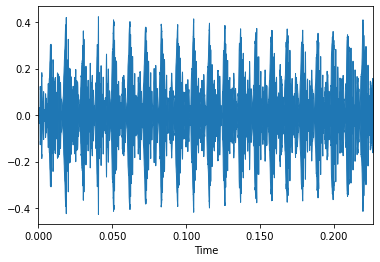

In [19]:
from scipy.signal import lfilter   #Ifilter는 b 넣고 a 넣고 signal 넣으면 된다. 뒤에는 default 값. - b는 FIR의 계수값들, a는 IIR의 계수값들
sig = s[7000:12000]    #given signal, '아' 부분
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)   #filter해주는 부분, b와 a 모두 array의 형태로 만들어줘야함.   #소리가 안바뀌게 하고 싶으면 b=1, a=1을 넣으면 됨
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

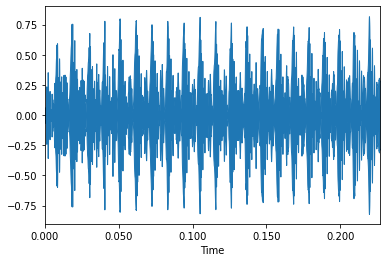

In [18]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1/2, 1/2, 1/2, 1/2]), np.array([1]), sig, axis=0) #2분의 1을 쓰면 부드러워지는 효과가 있다.
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

In [ ]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2]), np.array([1/10, -1/2, 2. -0.3]), sig, axis=0) #이런식으로 막 넣으면 error가 나올 수도 있음.
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

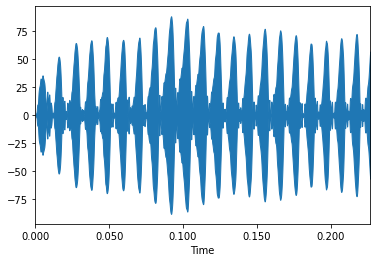

In [20]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1/2, 1/2, 1/2, 1/2, 1/2, 1/2, 1/2]), np.array([1/2, -1/2]), sig, axis=0)  #계수값을 바꿔서 소리를 바꿀 수 있다.
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

### RMS(Root Mean Square) for intensity

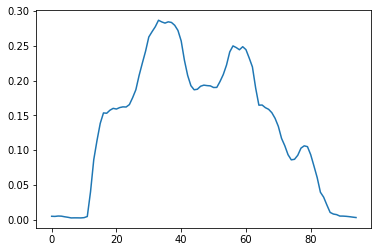

In [21]:
rms = librosa.feature.rms(s)   #이거는 진폭을 plotting해놓는거임. 소리의 크기와 관련이 있는거임. 높낮이와 상관없음.
plt.plot(rms[0])

### Autocorrelation for pitch(F0) measurement

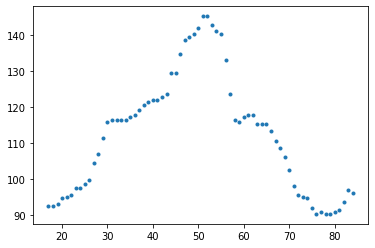

In [22]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.') #y축이 pitch(사실은 frequency) 1초에 성대가 몇번 왔다갔다하는가, 그게 HZ로 y축에 잡혀있다.